In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

614

In [6]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [7]:
# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=41fb285ad28592e648e9ec90b4522956


In [8]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [9]:
# Loop through all the cities in our list
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        
    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count
    record_count += 1
    
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"] 

        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the City information into city_data list
        city_data.append({"City": city.title(), 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | hobart
Processing Record 2 of Set 1 | butaritari
Processing Record 3 of Set 1 | mitu
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | seoul
Processing Record 6 of Set 1 | vaini
Processing Record 7 of Set 1 | cabo san lucas
Processing Record 8 of Set 1 | novikovo
Processing Record 9 of Set 1 | ponta do sol
Processing Record 10 of Set 1 | pacific grove
Processing Record 11 of Set 1 | kalmunai
Processing Record 12 of Set 1 | kristiansund
Processing Record 13 of Set 1 | kismayo
Processing Record 14 of Set 1 | puerto ayora
Processing Record 15 of Set 1 | geraldton
Processing Record 16 of Set 1 | tabukiniberu
City not found. Skipping...
Processing Record 17 of Set 1 | airai
Processing Record 18 of Set 1 | port lincoln
Processing Record 19 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 20 of Set 1 | oistins
Processing Record 21 of Set 1 | esso
Processing Record 22 of Set 1 | akhtubinsk
Processing Record 23 of Set 1 | la

Processing Record 38 of Set 4 | severo-yeniseyskiy
Processing Record 39 of Set 4 | pallasovka
Processing Record 40 of Set 4 | avarua
Processing Record 41 of Set 4 | saleaula
City not found. Skipping...
Processing Record 42 of Set 4 | maumere
Processing Record 43 of Set 4 | husavik
Processing Record 44 of Set 4 | trapani
Processing Record 45 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 46 of Set 4 | la ronge
Processing Record 47 of Set 4 | manzhouli
Processing Record 48 of Set 4 | misratah
Processing Record 49 of Set 4 | nepa nagar
Processing Record 50 of Set 4 | leningradskiy
Processing Record 1 of Set 5 | shingu
Processing Record 2 of Set 5 | aflu
City not found. Skipping...
Processing Record 3 of Set 5 | barstow
Processing Record 4 of Set 5 | falealupo
City not found. Skipping...
Processing Record 5 of Set 5 | wanaka
Processing Record 6 of Set 5 | montevideo
Processing Record 7 of Set 5 | mareeba
Processing Record 8 of Set 5 | lagdo
Processing Record 9 of Set 

Processing Record 25 of Set 8 | mangan
Processing Record 26 of Set 8 | ridgecrest
Processing Record 27 of Set 8 | kurdzhinovo
Processing Record 28 of Set 8 | puerto ayacucho
Processing Record 29 of Set 8 | tura
Processing Record 30 of Set 8 | high level
Processing Record 31 of Set 8 | dolbeau
City not found. Skipping...
Processing Record 32 of Set 8 | caohai
Processing Record 33 of Set 8 | koson
Processing Record 34 of Set 8 | gijon
Processing Record 35 of Set 8 | cape canaveral
Processing Record 36 of Set 8 | tanem
Processing Record 37 of Set 8 | katherine
Processing Record 38 of Set 8 | ponta delgada
Processing Record 39 of Set 8 | betioky
Processing Record 40 of Set 8 | masterton
Processing Record 41 of Set 8 | comodoro rivadavia
Processing Record 42 of Set 8 | chicama
Processing Record 43 of Set 8 | phrai bung
City not found. Skipping...
Processing Record 44 of Set 8 | san luis
Processing Record 45 of Set 8 | pecos
Processing Record 46 of Set 8 | nome
Processing Record 47 of Set 8 

Processing Record 17 of Set 12 | boddam
Processing Record 18 of Set 12 | mackay
Processing Record 19 of Set 12 | san quintin
Processing Record 20 of Set 12 | zambezi
Processing Record 21 of Set 12 | innisfail
Processing Record 22 of Set 12 | coihaique
Processing Record 23 of Set 12 | nizhniy baskunchak
Processing Record 24 of Set 12 | sur
Processing Record 25 of Set 12 | rudnogorsk
Processing Record 26 of Set 12 | tigil
Processing Record 27 of Set 12 | pozo colorado
Processing Record 28 of Set 12 | kihei
Processing Record 29 of Set 12 | magadan
Processing Record 30 of Set 12 | ajdabiya
Processing Record 31 of Set 12 | rio grande
Processing Record 32 of Set 12 | araripe
Processing Record 33 of Set 12 | bayji
Processing Record 34 of Set 12 | rungata
City not found. Skipping...
Processing Record 35 of Set 12 | morondava
Processing Record 36 of Set 12 | butterworth
Processing Record 37 of Set 12 | tierra blanca
Processing Record 38 of Set 12 | show low
Processing Record 39 of Set 12 | kena

In [11]:
#Check number of cities in city_data
len(city_data)

567

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hobart,-42.8794,147.3294,53.01,76,32,8.05,AU,2021-04-04 19:34:04
1,Butaritari,3.0707,172.7902,81.81,80,100,14.88,KI,2021-04-04 19:34:05
2,Mitu,1.1983,-70.1733,78.94,78,100,4.32,CO,2021-04-04 19:34:05
3,Ushuaia,-54.8000,-68.3000,48.20,53,40,11.50,AR,2021-04-04 19:31:43
4,Seoul,37.5683,126.9778,42.80,87,0,2.30,KR,2021-04-04 19:30:07
5,Vaini,-21.2000,-175.2000,77.00,73,20,8.05,TO,2021-04-04 19:34:05
6,Cabo San Lucas,22.8909,-109.9124,91.40,18,1,14.97,MX,2021-04-04 19:33:48
7,Novikovo,51.1537,37.8879,38.93,76,10,3.58,RU,2021-04-04 19:34:06
8,Ponta Do Sol,32.6667,-17.1000,61.00,62,80,1.01,PT,2021-04-04 19:34:06
9,Pacific Grove,36.6177,-121.9166,57.99,58,1,12.66,US,2021-04-04 19:34:06


In [13]:
#Reorder columns in city_data DataFrame
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hobart,AU,2021-04-04 19:34:04,-42.8794,147.3294,53.01,76,32,8.05
1,Butaritari,KI,2021-04-04 19:34:05,3.0707,172.7902,81.81,80,100,14.88
2,Mitu,CO,2021-04-04 19:34:05,1.1983,-70.1733,78.94,78,100,4.32
3,Ushuaia,AR,2021-04-04 19:31:43,-54.8000,-68.3000,48.20,53,40,11.50
4,Seoul,KR,2021-04-04 19:30:07,37.5683,126.9778,42.80,87,0,2.30
5,Vaini,TO,2021-04-04 19:34:05,-21.2000,-175.2000,77.00,73,20,8.05
6,Cabo San Lucas,MX,2021-04-04 19:33:48,22.8909,-109.9124,91.40,18,1,14.97
7,Novikovo,RU,2021-04-04 19:34:06,51.1537,37.8879,38.93,76,10,3.58
8,Ponta Do Sol,PT,2021-04-04 19:34:06,32.6667,-17.1000,61.00,62,80,1.01
9,Pacific Grove,US,2021-04-04 19:34:06,36.6177,-121.9166,57.99,58,1,12.66


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

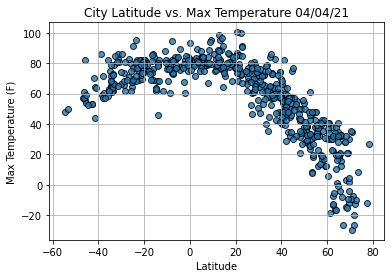

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

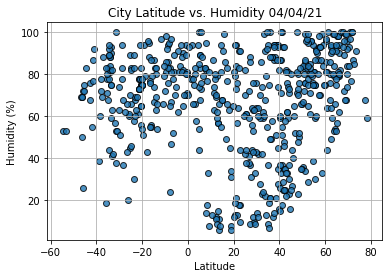

In [17]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

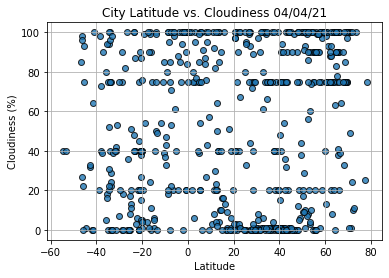

In [18]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

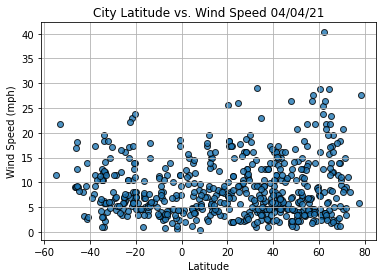

In [19]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [20]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [21]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
southern_hemi_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hobart,AU,2021-04-04 19:34:04,-42.8794,147.3294,53.01,76,32,8.05
3,Ushuaia,AR,2021-04-04 19:31:43,-54.8000,-68.3000,48.20,53,40,11.50
5,Vaini,TO,2021-04-04 19:34:05,-21.2000,-175.2000,77.00,73,20,8.05
12,Kismayo,SO,2021-04-04 19:29:26,-0.3582,42.5454,82.53,80,100,7.40
13,Puerto Ayora,EC,2021-04-04 19:33:28,-0.7393,-90.3518,84.20,70,20,17.27
...,...,...,...,...,...,...,...,...,...
555,Guarapari,BR,2021-04-04 19:33:07,-20.6667,-40.4975,80.60,65,40,13.80
557,Emerald,AU,2021-04-04 19:36:39,-23.5333,148.1667,71.60,83,40,10.36
560,Saint-Joseph,RE,2021-04-04 19:36:40,-21.3667,55.6167,78.80,73,0,5.75
562,Kandrian,PG,2021-04-04 19:36:41,-6.2167,149.5500,76.78,89,100,3.67


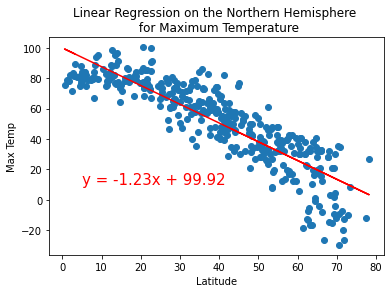

LinregressResult(slope=-1.2340568590206487, intercept=99.91654281022613, rvalue=-0.8737927146100853, pvalue=3.144169817597075e-123, stderr=0.03491196183329286)

In [22]:
#Max Temp 
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(5,10))

linregress(x_values,y_values)

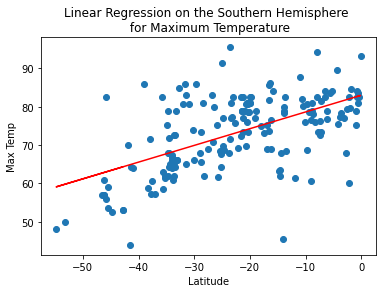

LinregressResult(slope=0.4351869608407669, intercept=82.97029794140865, rvalue=0.5708663708446358, pvalue=8.821050298316385e-17, stderr=0.04717924390250455)

In [23]:
#Max Temp
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-30,40))
#Check the r-values
linregress(x_values,y_values)

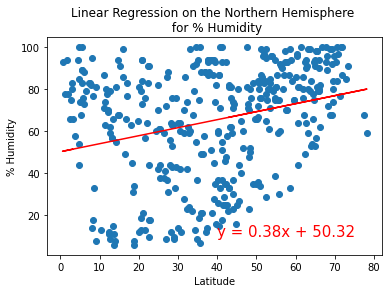

LinregressResult(slope=0.3807655210402407, intercept=50.319505962401905, rvalue=0.2795346609373099, pvalue=2.050092814498641e-08, stderr=0.0664812291560284)

In [24]:
# Humidity
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

#Check the r-values
linregress(x_values,y_values)

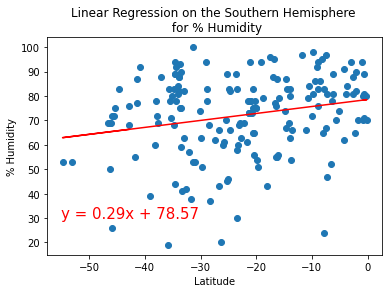

LinregressResult(slope=0.2850958796441636, intercept=78.56855431694133, rvalue=0.22713740328374812, pvalue=0.0022960905451076237, stderr=0.09213904191785786)

In [25]:
# Humidity
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-55,30))

#Check the r-values
linregress(x_values,y_values)

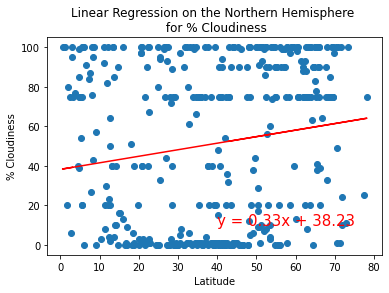

LinregressResult(slope=0.3305532466046597, intercept=38.23313463537909, rvalue=0.15849160335725282, pvalue=0.0017142934350354265, stderr=0.10467798587235277)

In [26]:
# Cloudiness 
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(40,10))

#Check the r-values
linregress(x_values,y_values)

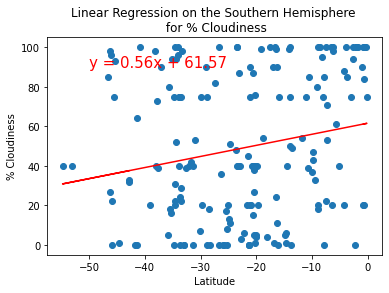

LinregressResult(slope=0.5604125877423551, intercept=61.57022843881137, rvalue=0.2000013249272836, pvalue=0.007436226221172749, stderr=0.2069446349106148)

In [27]:
# Cloudiness 
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,90))

#Check the r-values
linregress(x_values,y_values)

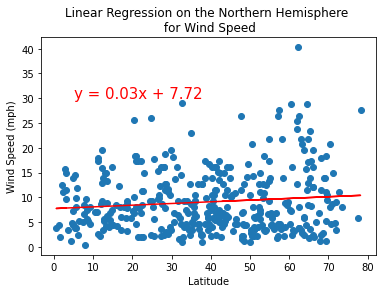

LinregressResult(slope=0.03407729390005583, intercept=7.721774767437271, rvalue=0.10721599395348688, pvalue=0.03452196249248853, stderr=0.016063471876353264)

In [28]:
# Wind Speed 
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed (mph)',(5,30))

#Check the r-values
linregress(x_values,y_values)

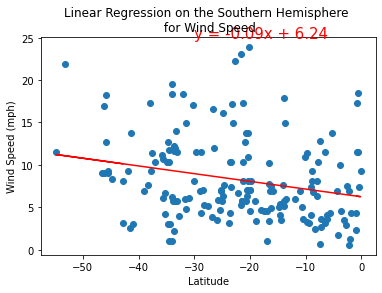

LinregressResult(slope=-0.0908534051439241, intercept=6.239247596418445, rvalue=-0.24413966683981567, pvalue=0.0010230108575446243, stderr=0.027202064956780805)

In [29]:
# Wind Speed 
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed (mph)',(-30,25))

#Check the r-values
linregress(x_values,y_values)